In [2]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import stats

C:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# Verileri pandas ile yükledik
twitch_df = pd.read_csv(r'Twitch_game_data.csv', encoding="latin-1")


print(twitch_df)

       Rank                              Game  Month  Year  Hours_watched  \
0         1                 League of Legends      1  2016       94377226   
1         2  Counter-Strike: Global Offensive      1  2016       47832863   
2         3                            Dota 2      1  2016       45185893   
3         4                       Hearthstone      1  2016       39936159   
4         5       Call of Duty: Black Ops III      1  2016       16153057   
...     ...                               ...    ...   ...            ...   
17395   196           PokÃ©mon Community Game      3  2023         626465   
17396   197                    Veiled Experts      3  2023         621189   
17397   198                     The Godfather      3  2023         615938   
17398   199                         RuneScape      3  2023         612387   
17399   200          Summoners War: Sky Arena      3  2023         607738   

       Hours_streamed  Peak_viewers  Peak_channels  Streamers  Avg_viewers 

Yukarıda oluşturduğumuz veri setinde görüldüğü üzere her bir ayda 200 adet oyun ve her bir oyuna ait Hours_watched bilgisi var. Bu veriyi group by yöntemiyle yıl ve ay bazında gruplandırdık ve hepsine denk gelen Hours_watched sütununun toplamını aldık. Böylelikle her bir yılın her bir ayının içindeki verilerin toplam Hours_watched değerini elde ettik. En son olarak değerleri sütun grafiğine aktardık.

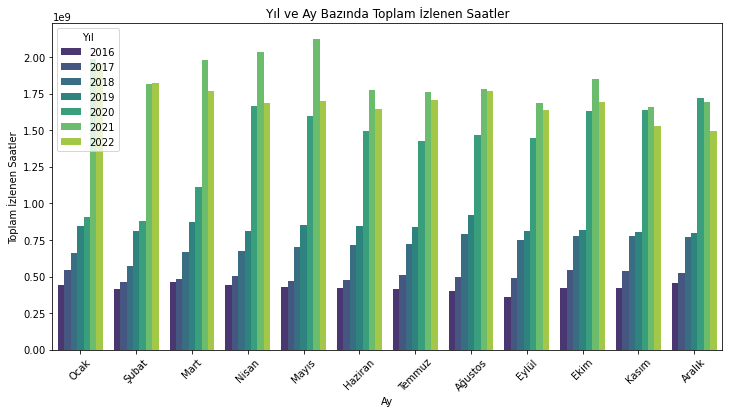

In [35]:
total_hours_watched_per_month = twitch_df.groupby(['Year', 'Month'])['Hours_watched'].sum().reset_index()

# Sıralanmış ayları ve toplam izlenen saatleri içeren bir DataFrame oluşturduk
sorted_months = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
data = []
for year in range(2016, 2023):
    for month in range(1, 13):
        month_hours = total_hours_watched_per_month[(total_hours_watched_per_month['Year'] == year) & (total_hours_watched_per_month['Month'] == month)]
        if not month_hours.empty:
            data.append([year, sorted_months[month-1], month_hours['Hours_watched'].values[0]])
df = pd.DataFrame(data, columns=['Year', 'Month', 'Total_Hours_Watched'])

# Sütun Grafiğini oluşturduk
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Total_Hours_Watched', hue='Year', data=df, palette='viridis')
plt.xlabel('Ay')
plt.ylabel('Toplam İzlenen Saatler')
plt.title('Yıl ve Ay Bazında Toplam İzlenen Saatler')
plt.xticks(rotation=45)
plt.legend(title='Yıl')
plt.show()

Aynı bar üstünde Peak Viewers ve Average Viewers görüntüleyerek k ortalama izleyici sayısı arttıkça pik izleyici sayısının doğru orantılı artıyor olduğunu anlamış olduk

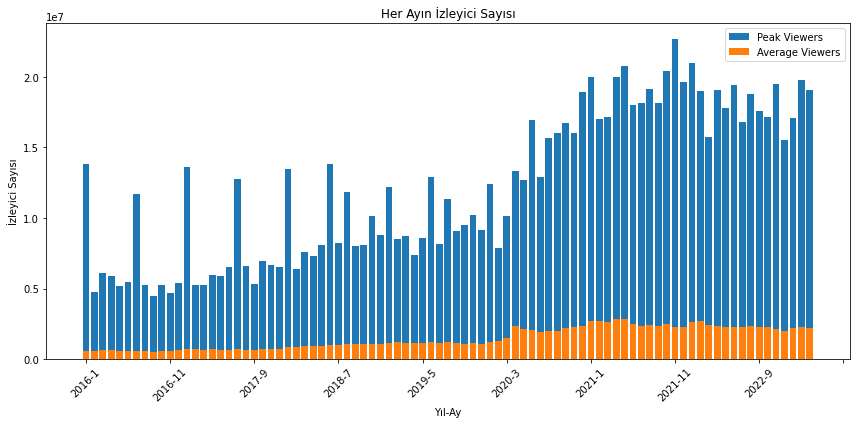

In [86]:
monthly_peak_viewers = twitch_df.groupby(['Year', 'Month'])['Peak_viewers'].sum().reset_index()
monthly_avg_viewers = twitch_df.groupby(['Year', 'Month'])['Avg_viewers'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(monthly_peak_viewers['Year'].astype(str) + '-' + monthly_peak_viewers['Month'].astype(str), monthly_peak_viewers['Peak_viewers'], label='Peak Viewers')
plt.bar(monthly_avg_viewers['Year'].astype(str) + '-' + monthly_avg_viewers['Month'].astype(str), monthly_avg_viewers['Avg_viewers'], label='Average Viewers')
plt.xlabel('Yıl-Ay')
plt.ylabel('İzleyici Sayısı')
plt.title('Her Ayın İzleyici Sayısı')
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Maksimum 10 tane x eksen işareti
plt.tight_layout()
plt.show()

Yıllara göre ortalama izleyici sayısını ısı haritasında gösterdik.

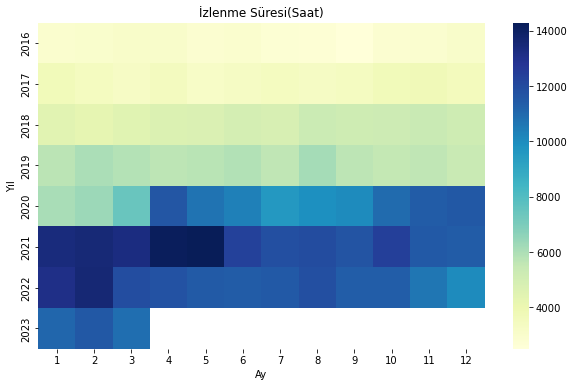

In [84]:
pivot_table = twitch_df.pivot_table(values='Avg_viewers', index='Year', columns='Month', aggfunc=np.mean)

# Heatmap oluşturduk
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.xlabel('Ay')
plt.ylabel('Yıl')
plt.title('İzlenme Süresi(Saat)')
plt.show()

In [36]:
# 2019 yılındaki verileri okuttuk.
twitch_df_2019 = twitch_df[(twitch_df.Year == 2019)]
twitch_df_2019

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
7200,1,Fortnite,1,2019,126502656,10205058,649136,56274,1013016,170259,13734,12.40
7201,2,League of Legends,1,2019,98976171,2245379,400257,6079,197058,133211,3022,44.08
7202,3,Just Chatting,1,2019,59064487,803672,184542,1757,134201,79494,1081,73.49
7203,4,Dota 2,1,2019,46512393,546394,444825,1462,42722,62600,735,85.13
7204,5,Counter-Strike: Global Offensive,1,2019,30778297,1051447,187678,2895,159310,41424,1415,29.27
...,...,...,...,...,...,...,...,...,...,...,...,...
9595,196,Hollow Knight,12,2019,282292,25529,7832,78,4056,379,34,11.06
9596,197,Kingdom Come: Deliverance,12,2019,277506,6728,30758,24,1029,373,9,41.25
9597,198,Barbie and The Magic of Pegasus,12,2019,276731,253,26470,5,70,372,0,1093.80
9598,199,StarCraft,12,2019,275977,12444,2090,40,969,371,16,22.18


Elde ettiğimiz verileri Hours_watched sütununu baz alarak en büyük değerden en küçük değere sıraladık. Daha sonra veriyi Month sütununa göre grupladık ve her bir ayın ilk 10 değerini değişkene aktardık.Bu işlemi 2020, 2021, 2022 yılı için tekrarladık.

In [37]:
# Elde ettiğimiz verileri Hours_watched sütununu baz alarak en büyük değerden en küçük değere sıraladık

top_10_games_by_viewers_2019 = twitch_df_2019.groupby(["Month", "Game", "Avg_viewers","Avg_channels"])["Hours_watched"].max().reset_index()
top_10_games_by_viewers_2019 = top_10_games_by_viewers_2019.sort_values(["Month", "Hours_watched"], ascending = False)

# Yukaridaki veriyi Month sütununa göre grupladık ve her bir ayın ilk 10 değerini değişkene aktardık. 
top_10_games_by_viewers_2019 = top_10_games_by_viewers_2019.groupby("Month").head(10)
top_10_games_by_viewers_2019

,Month,Game,Avg_viewers,Avg_channels,Hours_watched
2284,12,Just Chatting,112503,1702,83590066
2292,12,League of Legends,105759,3098,78579242
2260,12,Fortnite,86444,5191,64228513
2225,12,Counter-Strike: Global Offensive,54455,1316,40460483
2268,12,Grand Theft Auto V,50966,1011,37868145
...,...,...,...,...,...
115,1,PLAYERUNKNOWN'S BATTLEGROUNDS,40177,1662,29852076
76,1,Hearthstone,32944,232,24477856
114,1,Overwatch,30281,1605,22499093
51,1,FIFA 19,25057,478,18618028


Yukarıda gruplanmış olan verideki her bir farklı oyunu ve bu oyunların Hours_watched değerini alarak scatterplot grafiğine ekledik, renk skalasını ise bu verinin Month sütununu baz alarak belirledik. Bu işlemin aynısını 2020, 2021, 2022 yılları için tekrarladık.

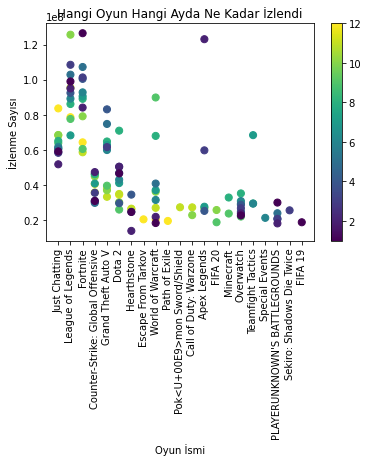

In [38]:
#Scatterplot grafiğini oluşturduk
plt.scatter(top_10_games_by_viewers_2019.Game, top_10_games_by_viewers_2019.Hours_watched, s=50, c=top_10_games_by_viewers_2019.Month)
plt.xticks(rotation=90)

# Grafik başlığımız
plt.title('Hangi Oyun Hangi Ayda Ne Kadar İzlendi')

# X ekseninin başlığı
plt.xlabel('Oyun İsmi')

# Y ekseninin başlığı
plt.ylabel('İzlenme Sayısı')

# Renk skalasını ekledik
plt.colorbar()

# Grafikleri gösterdik
plt.show()

Yukarıda filtreleme işlemi uyguladıktan sonra elde ettiğimiz veriyi Game sütununu baz alarak kaç kez tekrar ettiğini hesapladık ve böylelikle elde ettiğimiz her bir oyunun kaç ay boyunca top200 listesine girdiğini elde ettik. Bu işlemi 2020, 2021, 2022 yılları için tekrarladık. 


In [39]:
top_10_games_by_month_2019 = top_10_games_by_viewers_2019.Game.value_counts()
top_10_games_by_month_2019

Just Chatting                       12
Dota 2                              12
Fortnite                            12
Counter-Strike: Global Offensive    12
League of Legends                   12
World of Warcraft                   10
Grand Theft Auto V                  10
Overwatch                            9
Hearthstone                          6
PLAYERUNKNOWN'S BATTLEGROUNDS        5
Apex Legends                         5
Teamfight Tactics                    3
Call of Duty: Warzone                2
FIFA 20                              2
Minecraft                            2
Sekiro: Shadows Die Twice            1
Special Events                       1
Pok<U+00E9>mon Sword/Shield          1
Path of Exile                        1
Escape From Tarkov                   1
FIFA 19                              1
Name: Game, dtype: int64

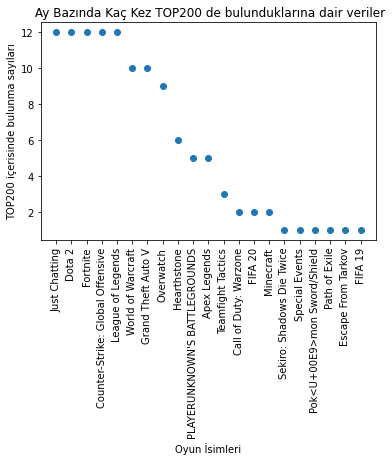

In [40]:
# Yukarıdaki veriye dayanarak çubuk grafiğini oluşturduk
fig, ax = plt.subplots()
ax.scatter(top_10_games_by_month_2019.index, top_10_games_by_month_2019.values)

# Grafik başlığı ve etiketleri ekledik
ax.set_ylabel('TOP200 içerisinde bulunma sayıları')
ax.set_xlabel('Oyun İsimleri')
ax.set_title(' Ay Bazında Kaç Kez TOP200 de bulunduklarına dair veriler')

# X ekseni etiketlerini 90 derece döndürdük
plt.xticks(rotation=90)

# Grafiği gösterdik
plt.show()

In [41]:
# 2020 yılındaki verilerin okunması
twitch_df_2020 = twitch_df[(twitch_df.Year == 2020)]
twitch_df_2020

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
9600,1,League of Legends,1,2020,99657869,2953365,349964,8083,237426,134129,3974,33.74
9601,2,Just Chatting,1,2020,88378302,1409820,631876,2959,214185,118947,1897,62.69
9602,3,Escape From Tarkov,1,2020,72356308,1043028,287491,2376,60579,97383,1403,69.37
9603,4,Fortnite,1,2020,53731549,4399954,595541,11303,502688,72317,5921,12.21
9604,5,Dota 2,1,2020,44025208,442024,364279,1055,30616,59253,594,99.60
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,196,Visage,12,2020,524013,18022,16424,78,3960,705,24,29.08
11996,197,Outlast,12,2020,519209,27662,97966,107,8728,698,37,18.77
11997,198,Call of the Sea,12,2020,515643,8380,45252,104,1806,694,11,61.53
11998,199,Fallout 76,12,2020,515422,79420,3226,201,6147,693,106,6.49


In [42]:
top_10_games_by_viewers_2020 = twitch_df_2020.groupby(["Month", "Game", "Avg_viewers","Avg_channels"])["Hours_watched"].max().reset_index()
top_10_games_by_viewers_2020 = top_10_games_by_viewers_2020.sort_values(["Month", "Hours_watched"], ascending = False)
top_10_games_by_viewers_2020 = top_10_games_by_viewers_2020.groupby("Month").head(10)

# Sonucu ekrana yazdırma
top_10_games_by_viewers_2020

,Month,Game,Avg_viewers,Avg_channels,Hours_watched
2285,12,Just Chatting,334553,4239,248573448
2262,12,Fortnite,146288,9732,108692225
2290,12,League of Legends,129761,4437,96413165
2393,12,World of Warcraft,121403,3154,90202480
2305,12,Minecraft,97096,3682,72142619
...,...,...,...,...,...
71,1,Grand Theft Auto V,57398,1260,42646840
24,1,Counter-Strike: Global Offensive,45616,1638,33893286
191,1,World of Warcraft,37097,1266,27563181
53,1,FIFA 20,32015,477,23787522


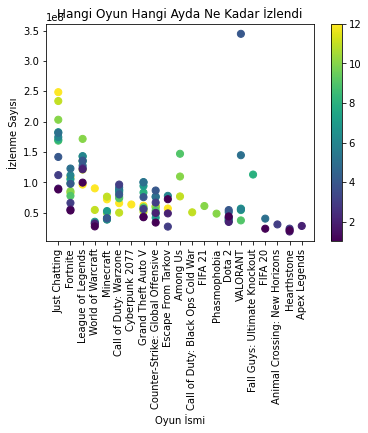

In [43]:
plt.scatter(top_10_games_by_viewers_2020.Game, top_10_games_by_viewers_2020.Hours_watched, s=50, c=top_10_games_by_viewers_2020.Month)
plt.xticks(rotation=90)

# Grafik başlığı
plt.title('Hangi Oyun Hangi Ayda Ne Kadar İzlendi')

# X ekseninin başlığı
plt.xlabel('Oyun İsmi')

# Y ekseninin başlığı
plt.ylabel('İzlenme Sayısı')

# Renk skalasını ekleme
plt.colorbar()

# Grafikleri göster
plt.show()

In [44]:
top_10_games_by_month_2020 = top_10_games_by_viewers_2020.Game.value_counts()
top_10_games_by_month_2020

Just Chatting                       12
League of Legends                   12
Grand Theft Auto V                  12
Counter-Strike: Global Offensive    12
Fortnite                            12
Call of Duty: Warzone               10
Dota 2                               9
Minecraft                            9
World of Warcraft                    6
VALORANT                             6
Escape From Tarkov                   5
Hearthstone                          3
Among Us                             3
FIFA 20                              2
Phasmophobia                         1
FIFA 21                              1
Call of Duty: Black Ops Cold War     1
Fall Guys: Ultimate Knockout         1
Animal Crossing: New Horizons        1
Cyberpunk 2077                       1
Apex Legends                         1
Name: Game, dtype: int64

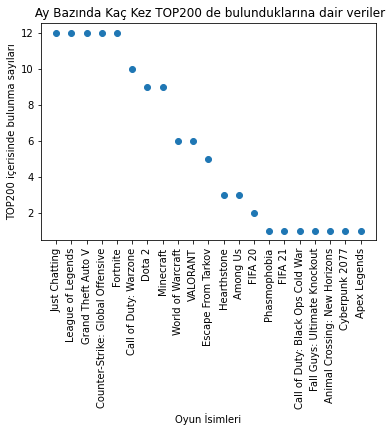

In [57]:
# Çubuk grafiğini oluşturulması
fig, ax = plt.subplots()
ax.scatter(top_10_games_by_month_2020.index, top_10_games_by_month_2020.values)

# Grafik başlığı ve etiketleri ekleme
ax.set_ylabel('TOP200 içerisinde bulunma sayıları')
ax.set_xlabel('Oyun İsimleri')
ax.set_title(' Ay Bazında Kaç Kez TOP200 de bulunduklarına dair veriler')

# X ekseni etiketlerini 90 derece döndürülmesi
plt.xticks(rotation=90)

# Grafiği gösterme
plt.show()

In [70]:
# 2021 yılındaki verilerin okunması
twitch_df_2021 = twitch_df[(twitch_df.Year == 2021)]
twitch_df_2021

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
12000,1,Just Chatting,1,2021,248144653,3420670,2787896,8240,464702,333976,4603,72.54
12001,2,Rust,1,2021,190468488,1147089,1373791,3249,91592,256350,1543,166.05
12002,3,League of Legends,1,2021,170781975,4354400,689503,11606,294795,229854,5860,39.22
12003,4,Escape From Tarkov,1,2021,110847591,1594856,441410,4268,67458,149189,2146,69.50
12004,5,Fortnite,1,2021,101306583,7396984,997440,19348,689937,136348,9955,13.70
...,...,...,...,...,...,...,...,...,...,...,...,...
14395,196,Garry's Mod,12,2021,630902,21753,24951,99,3537,849,29,29.00
14396,197,Call of Duty: Black Ops Cold War,12,2021,622497,223641,26559,654,25366,837,300,2.78
14397,198,Noita,12,2021,620983,13935,27826,41,1961,835,18,44.56
14398,199,Pro Soccer Online,12,2021,619859,606,36182,20,84,834,0,1022.87


In [69]:
top_10_games_by_viewers_2021 = twitch_df_2021.groupby(["Month", "Game", "Avg_viewers","Avg_channels"])["Hours_watched"].max().reset_index()
top_10_games_by_viewers_2021 = top_10_games_by_viewers_2021.sort_values(["Month", "Hours_watched"], ascending = False)
top_10_games_by_viewers_2021 = top_10_games_by_viewers_2021.groupby("Month").head(10)

# Sonucu ekrana yazdırma
top_10_games_by_viewers_2021

,Month,Game,Avg_viewers,Avg_channels,Hours_watched
2290,12,Just Chatting,365462,4194,271538951
2269,12,Grand Theft Auto V,157493,2616,117017755
2386,12,VALORANT,132310,3785,98306478
2295,12,League of Legends,128103,3318,95180552
2248,12,Escape from Tarkov,103715,1504,77060574
...,...,...,...,...,...
99,1,Minecraft,107774,4834,80076090
23,1,Call of Duty: Warzone,107748,4446,80057408
68,1,Grand Theft Auto V,99677,2735,74060698
27,1,Counter-Strike: Global Offensive,81964,2247,60899705


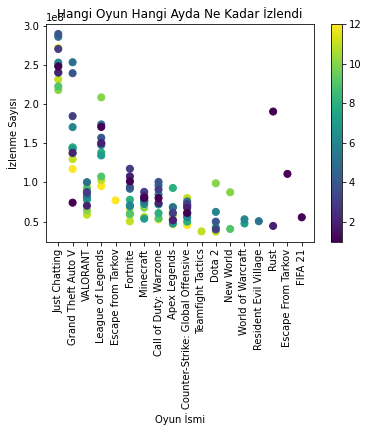

In [68]:
plt.scatter(top_10_games_by_viewers_2021.Game, top_10_games_by_viewers_2021.Hours_watched, s=50, c=top_10_games_by_viewers_2021.Month)
plt.xticks(rotation=90)

# Grafik başlığı
plt.title('Hangi Oyun Hangi Ayda Ne Kadar İzlendi')

# X ekseninin başlığı
plt.xlabel('Oyun İsmi')

# Y ekseninin başlığı
plt.ylabel('İzlenme Sayısı')

# Renk skalasını ekleme
plt.colorbar()

# Grafikleri göster
plt.show()

In [72]:
top_10_games_by_month_2021 = top_10_games_by_viewers_2021.Game.value_counts()
top_10_games_by_month_2021

Just Chatting                       12
Fortnite                            12
Grand Theft Auto V                  12
Minecraft                           12
Counter-Strike: Global Offensive    12
League of Legends                   12
VALORANT                            11
Call of Duty: Warzone               10
Apex Legends                        10
Dota 2                               6
New World                            2
World of Warcraft                    2
Rust                                 2
Escape from Tarkov                   1
Teamfight Tactics                    1
Resident Evil Village                1
Escape From Tarkov                   1
FIFA 21                              1
Name: Game, dtype: int64

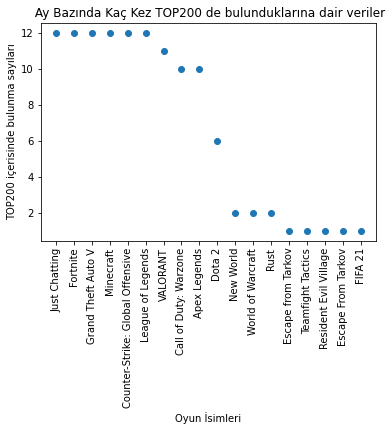

In [73]:
# Çubuk grafiğini oluşturulması
fig, ax = plt.subplots()
ax.scatter(top_10_games_by_month_2021.index, top_10_games_by_month_2021.values)

# Grafik başlığı ve etiketleri ekleme
ax.set_ylabel('TOP200 içerisinde bulunma sayıları')
ax.set_xlabel('Oyun İsimleri')
ax.set_title(' Ay Bazında Kaç Kez TOP200 de bulunduklarına dair veriler')

# X ekseni etiketlerini 90 derece döndürülmesi
plt.xticks(rotation=90)

# Grafiği gösterme
plt.show()

In [74]:
# 2022 yılındaki verilerin okunması
twitch_df_2022 = twitch_df[(twitch_df.Year == 2022)]
twitch_df_2022

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
14400,1,Just Chatting,1,2022,283669656,3292459,1084947,7655,701244,381789,4431,86.16
14401,2,League of Legends,1,2022,184282005,3368623,669460,8924,321715,248024,4533,54.71
14402,3,Grand Theft Auto V,1,2022,152328213,2219509,585776,5606,305652,205017,2987,68.63
14403,4,Escape from Tarkov,1,2022,93334264,1343113,690725,3186,71932,125618,1807,69.49
14404,5,VALORANT,1,2022,84354184,3736976,288190,8721,430961,113531,5029,22.57
...,...,...,...,...,...,...,...,...,...,...,...,...
16795,196,SCUM,12,2022,608613,47458,26987,151,3591,819,63,12.82
16796,197,Dungeon Fighter Online,12,2022,606520,17372,5243,70,742,816,23,34.91
16797,198,Detroit: Become Human,12,2022,600990,21395,23681,92,5198,808,28,28.09
16798,199,Super People,12,2022,597551,29116,23584,124,3432,804,39,20.52


In [75]:
top_10_games_by_viewers_2022 = twitch_df_2022.groupby(["Month", "Game", "Avg_viewers","Avg_channels"])["Hours_watched"].max().reset_index()
top_10_games_by_viewers_2022 = top_10_games_by_viewers_2022.sort_values(["Month", "Hours_watched"], ascending = False)
top_10_games_by_viewers_2022 = top_10_games_by_viewers_2022.groupby("Month").head(10)

# Sonucu ekrana yazdırma
top_10_games_by_viewers_2022

,Month,Game,Avg_viewers,Avg_channels,Hours_watched
2280,12,Just Chatting,342559,3770,254521690
2265,12,Grand Theft Auto V,130478,2470,96945210
2395,12,World of Warcraft,101007,1607,75048722
2282,12,League of Legends,94055,2321,69883580
2383,12,VALORANT,85897,3730,63821561
...,...,...,...,...,...
60,1,Fortnite,94611,6437,70296392
8,1,Apex Legends,85768,4950,63726123
142,1,Rust,85619,521,63615081
108,1,Minecraft,81167,2908,60307178


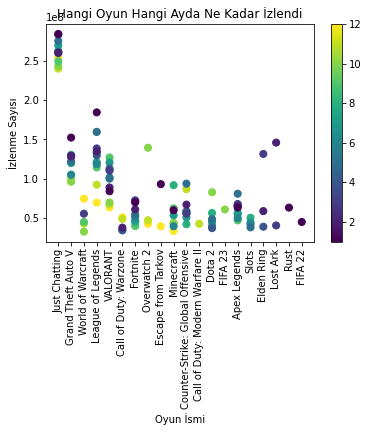

In [76]:
plt.scatter(top_10_games_by_viewers_2022.Game, top_10_games_by_viewers_2022.Hours_watched, s=50, c=top_10_games_by_viewers_2022.Month)
plt.xticks(rotation=90)

# Grafik başlığı
plt.title('Hangi Oyun Hangi Ayda Ne Kadar İzlendi')

# X ekseninin başlığı
plt.xlabel('Oyun İsmi')

# Y ekseninin başlığı
plt.ylabel('İzlenme Sayısı')

# Renk skalasını ekleme
plt.colorbar()

# Grafikleri göster
plt.show()

In [77]:
top_10_games_by_month_2022 = top_10_games_by_viewers_2022.Game.value_counts()
top_10_games_by_month_2022

Just Chatting                       12
Grand Theft Auto V                  12
League of Legends                   12
VALORANT                            12
Fortnite                            10
Counter-Strike: Global Offensive    10
Apex Legends                         9
Minecraft                            8
Dota 2                               7
Call of Duty: Warzone                5
World of Warcraft                    5
Slots                                4
Overwatch 2                          3
Elden Ring                           3
Escape from Tarkov                   2
Lost Ark                             2
Call of Duty: Modern Warfare II      1
FIFA 23                              1
Rust                                 1
FIFA 22                              1
Name: Game, dtype: int64

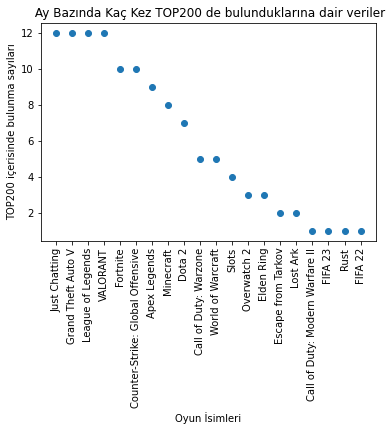

In [78]:
# Çubuk grafiğini oluşturulması
fig, ax = plt.subplots()
ax.scatter(top_10_games_by_month_2022.index, top_10_games_by_month_2022.values)

# Grafik başlığı ve etiketleri ekleme
ax.set_ylabel('TOP200 içerisinde bulunma sayıları')
ax.set_xlabel('Oyun İsimleri')
ax.set_title(' Ay Bazında Kaç Kez TOP200 de bulunduklarına dair veriler')

# X ekseni etiketlerini 90 derece döndürülmesi
plt.xticks(rotation=90)

# Grafiği gösterme
plt.show()

Her yılın her ayının Hours_watched sütununa göre sıralanmış top10 oyununu diğer yıllardaki benzer ayların  top10 oyunlarıyla karşılaştırılıp aynı isme sahip oyunların verilerini yeni bir değişkene aktardık.Aynı sütunlar olabilme ihtimaline karşı drop_duplicates fonksiyonunu kullandık.

In [80]:
# Her bir ayın ilk on oyunun diğer yıllardaki benzer ayunlarla karşılaştırdık
merged_results = pd.merge(top_10_games_by_viewers_2019, top_10_games_by_viewers_2020, on=['Month', 'Game'], suffixes=('_2019', '_2020'))
merged_results = pd.merge(merged_results, top_10_games_by_viewers_2021, on=['Month', 'Game'])
merged_results = pd.merge(merged_results, top_10_games_by_viewers_2022, on=['Month', 'Game'], suffixes=('_2021', '_2022'))

# Aynı olan sonuçları teke düşürdük
deduplicated_results = merged_results.drop_duplicates(subset=['Month', 'Game'])

# Sonuçları ekrana yazdırdık
deduplicated_results

,Month,Game,Avg_viewers_2019,Avg_channels_2019,Hours_watched_2019,Avg_viewers_2020,Avg_channels_2020,Hours_watched_2020,Avg_viewers_2021,Avg_channels_2021,Hours_watched_2021,Avg_viewers_2022,Avg_channels_2022,Hours_watched_2022
0,12,Just Chatting,112503,1702,83590066,334553,4239,248573448,365462,4194,271538951,342559,3770,254521690
1,12,League of Legends,105759,3098,78579242,129761,4437,96413165,128103,3318,95180552,94055,2321,69883580
2,12,Fortnite,86444,5191,64228513,146288,9732,108692225,90228,6505,67039763,63456,5464,47147947
3,12,Grand Theft Auto V,50966,1011,37868145,83054,2432,61709131,157493,2616,117017755,130478,2470,96945210
4,11,League of Legends,132735,2957,95436703,168407,4718,121085351,142715,3366,102612188,128852,2575,92645258
5,11,Just Chatting,94947,1484,68267215,325397,3988,233960587,321995,3934,231514981,333457,3715,239755926
6,11,Counter-Strike: Global Offensive,49522,1238,35606495,84442,1804,60714096,111239,1323,79981393,120920,926,86942107
7,11,Grand Theft Auto V,46104,788,33148853,71923,1891,51712871,180262,2438,129608680,138326,2361,99456990
8,10,League of Legends,169123,2967,125658644,230973,4531,171613067,280719,3351,208574800,214867,2740,159646745
9,10,Just Chatting,92086,1466,68419996,273431,3711,203159545,293397,3963,217994303,326998,3963,242960233


Yukarıdaki filtreleme işlemi sonucunda en son elde ettiğimiz Avg_viewers değerlerini ay bazında paralel koordinatlar grafiğine aktardık.

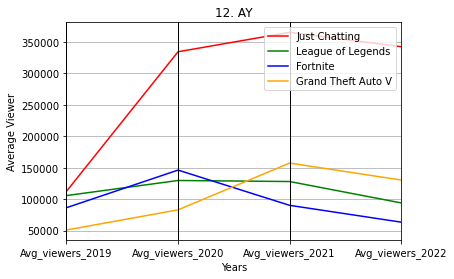

In [81]:
# Her yılın 12. ayında bulunan oyunların ortalama izlenme sayılarının paralel koordinat grafiği üzerinden karşılaştırdık

paralel_coord_12 = deduplicated_results[(deduplicated_results.Month == 12)]

fig, ax = plt.subplots()
pd.plotting.parallel_coordinates(paralel_coord_12, 
                                  cols=["Avg_viewers_2019", "Avg_viewers_2020", "Avg_viewers_2021", "Avg_viewers_2022"],
                                    class_column="Game",
                                     color=["red", "green", "blue", "orange", "yellow", "purple", "brown"],
                                  ax=ax)

# Eksenleri etiketledik
ax.set_xlabel("Years")
ax.set_ylabel("Average Viewer")
# Grafik başlığımız
ax.set_title('12. AY')

# Grafiği gösterdiik
plt.show()

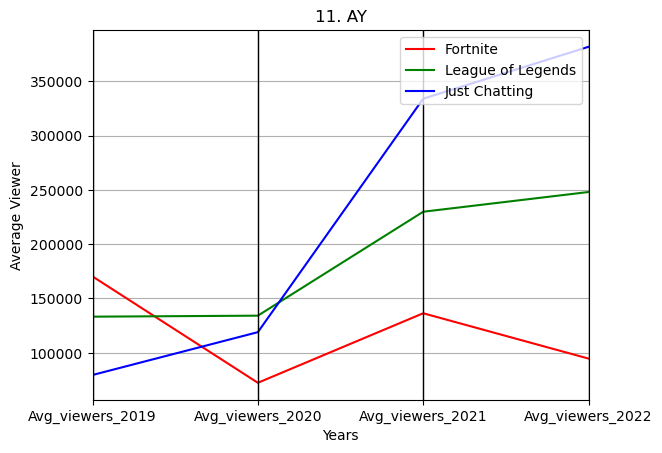

In [168]:
# Her yılın 11. ayında bulunan oyunların ortalama izlenme sayılarının paralel koordinat grafiği üzerinden karşılaştırdık

paralel_coord_11 = deduplicated_results[(deduplicated_results.Month == 11)]

fig, ax = plt.subplots()
pd.plotting.parallel_coordinates(paralel_coord_1, 
                                  cols=["Avg_viewers_2019", "Avg_viewers_2020", "Avg_viewers_2021", "Avg_viewers_2022"],
                                    class_column="Game",
                                     color=["red", "green", "blue", "orange", "yellow", "purple", "brown"],
                                  ax=ax)

# Eksenleri etiketledik
ax.set_xlabel("Years")
ax.set_ylabel("Average Viewer")
# Grafik başlığımız
ax.set_title('11. AY')

# Grafiği gösterdik
plt.show()

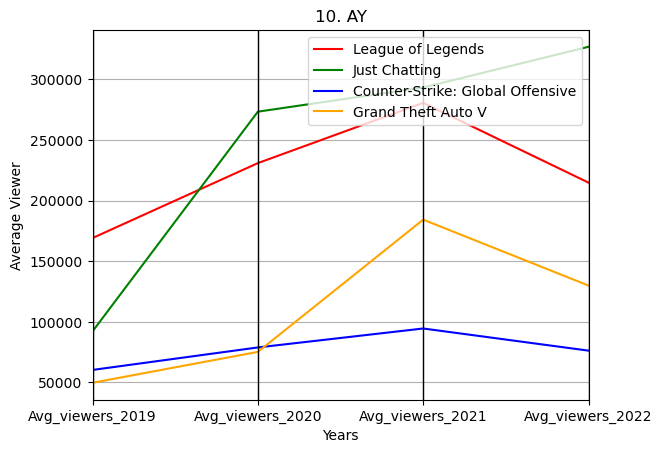

In [169]:
# Her yılın 10. ayında bulunan oyunların ortalama izlenme sayılarının paralel koordinat grafiği üzerinden karşılaştırdık

paralel_coord_10 = deduplicated_results[(deduplicated_results.Month == 10)]

fig, ax = plt.subplots()
pd.plotting.parallel_coordinates(paralel_coord_10, 
                                  cols=["Avg_viewers_2019", "Avg_viewers_2020", "Avg_viewers_2021", "Avg_viewers_2022"],
                                    class_column="Game",
                                     color=["red", "green", "blue", "orange", "yellow", "purple", "brown"],
                                  ax=ax)

# Eksenleri etiketledik
ax.set_xlabel("Years")
ax.set_ylabel("Average Viewer")
# Grafik başlığımız
ax.set_title('10. AY')

# Grafiği gösterdik
plt.show()

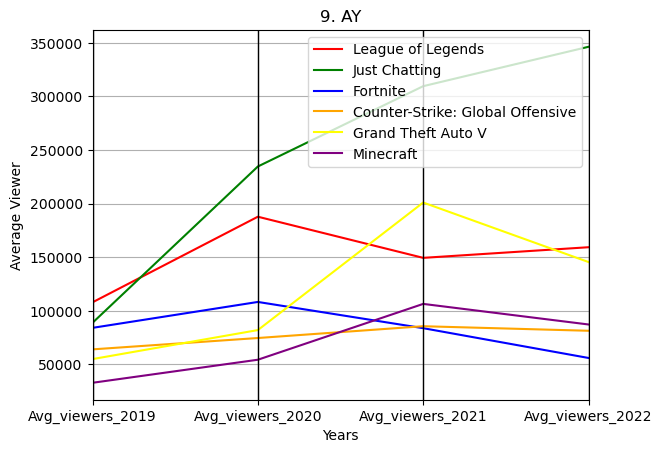

In [170]:
# Her yılın 9. ayında bulunan oyunların ortalama izlenme sayılarının paralel koordinat grafiği üzerinden karşılaştırdık

paralel_coord_9 = deduplicated_results[(deduplicated_results.Month == 9)]

fig, ax = plt.subplots()
pd.plotting.parallel_coordinates(paralel_coord_9, 
                                  cols=["Avg_viewers_2019", "Avg_viewers_2020", "Avg_viewers_2021", "Avg_viewers_2022"],
                                    class_column="Game",
                                     color=["red", "green", "blue", "orange", "yellow", "purple", "brown"],
                                  ax=ax)

# Eksenleri etiketledik
ax.set_xlabel("Years")
ax.set_ylabel("Average Viewer")
# Grafik başlığımız
ax.set_title('9. AY')

# Grafiği gösterdik
plt.show()

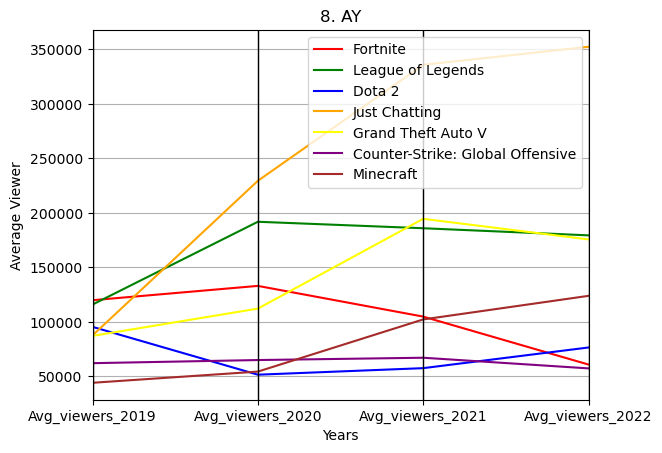

In [171]:
# Her yılın 8. ayında bulunan oyunların ortalama izlenme sayılarının paralel koordinat grafiği üzerinden karşılaştırdık

paralel_coord_8 = deduplicated_results[(deduplicated_results.Month == 8)]

fig, ax = plt.subplots()
pd.plotting.parallel_coordinates(paralel_coord_8, 
                                  cols=["Avg_viewers_2019", "Avg_viewers_2020", "Avg_viewers_2021", "Avg_viewers_2022"],
                                    class_column="Game",
                                     color=["red", "green", "blue", "orange", "yellow", "purple", "brown"],
                                  ax=ax)

# Eksenleri etiketledik
ax.set_xlabel("Years")
ax.set_ylabel("Average Viewer")
# Grafik başlığımız
ax.set_title('8. AY')

# Grafiği gösterdik
plt.show()

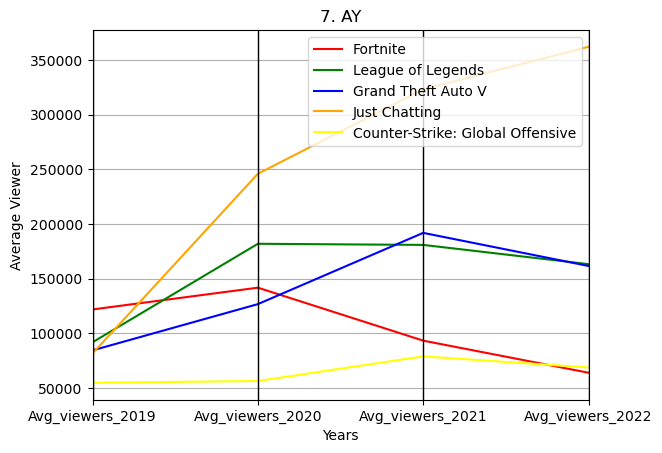

In [172]:
# Her yılın 7. ayında bulunan oyunların ortalama izlenme sayılarının paralel koordinat grafiği üzerinden karşılaştırdık

paralel_coord_7 = deduplicated_results[(deduplicated_results.Month == 7)]

fig, ax = plt.subplots()
pd.plotting.parallel_coordinates(paralel_coord_7, 
                                  cols=["Avg_viewers_2019", "Avg_viewers_2020", "Avg_viewers_2021", "Avg_viewers_2022"],
                                    class_column="Game",
                                     color=["red", "green", "blue", "orange", "yellow", "purple", "brown"],
                                  ax=ax)

# Eksenleri etiketledik
ax.set_xlabel("Years")
ax.set_ylabel("Average Viewer")
# Grafik başlığımız
ax.set_title('7. AY')

# Grafiği gösterdik
plt.show()

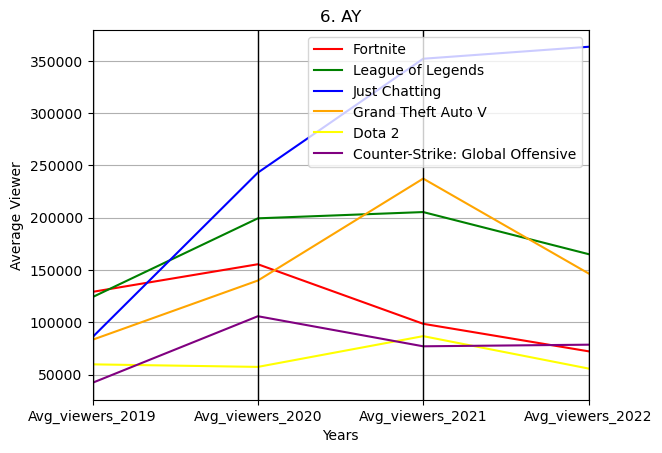

In [173]:
# Her yılın 6. ayında bulunan oyunların ortalama izlenme sayılarının paralel koordinat grafiği üzerinden karşılaştırdık

paralel_coord_6 = deduplicated_results[(deduplicated_results.Month == 6)]

fig, ax = plt.subplots()
pd.plotting.parallel_coordinates(paralel_coord_6, 
                                  cols=["Avg_viewers_2019", "Avg_viewers_2020", "Avg_viewers_2021", "Avg_viewers_2022"],
                                    class_column="Game",
                                     color=["red", "green", "blue", "orange", "yellow", "purple", "brown"],
                                  ax=ax)

# Eksenleri etiketledik
ax.set_xlabel("Years")
ax.set_ylabel("Average Viewer")
# Grafik başlığımız
ax.set_title('6. AY')

# Grafiği gösterdik
plt.show()

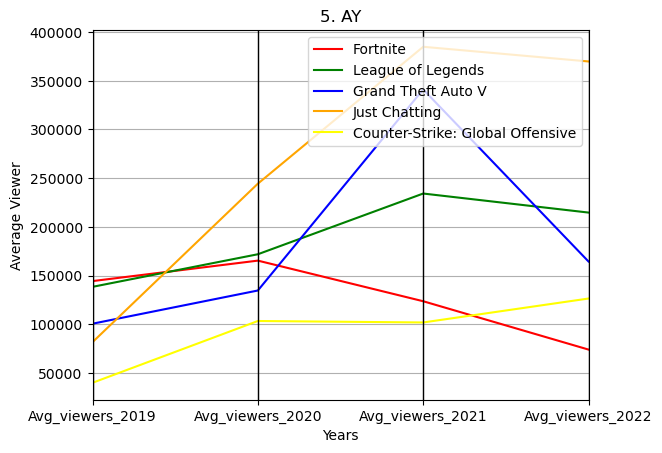

In [174]:
# Her yılın 5. ayında bulunan oyunların ortalama izlenme sayılarının paralel koordinat grafiği üzerinden karşılaştırdık

paralel_coord_5 = deduplicated_results[(deduplicated_results.Month == 5)]

fig, ax = plt.subplots()
pd.plotting.parallel_coordinates(paralel_coord_5, 
                                  cols=["Avg_viewers_2019", "Avg_viewers_2020", "Avg_viewers_2021", "Avg_viewers_2022"],
                                    class_column="Game",
                                     color=["red", "green", "blue", "orange", "yellow", "purple", "brown"],
                                  ax=ax)

# Eksenleri etiketledik
ax.set_xlabel("Years")
ax.set_ylabel("Average Viewer")
# Grafik başlığımız
ax.set_title('5. AY')

# Grafiği gösterdik
plt.show()

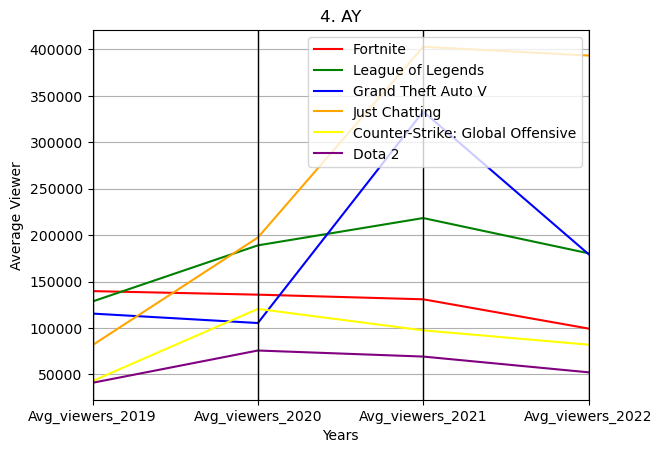

In [175]:
# Her yılın 4. ayında bulunan oyunların ortalama izlenme sayılarının paralel koordinat grafiği üzerinden karşılaştırdık

paralel_coord_4 = deduplicated_results[(deduplicated_results.Month == 4)]

fig, ax = plt.subplots()
pd.plotting.parallel_coordinates(paralel_coord_4, 
                                  cols=["Avg_viewers_2019", "Avg_viewers_2020", "Avg_viewers_2021", "Avg_viewers_2022"],
                                    class_column="Game",
                                     color=["red", "green", "blue", "orange", "yellow", "purple", "brown"],
                                  ax=ax)

# Eksenleri etiketledik
ax.set_xlabel("Years")
ax.set_ylabel("Average Viewer")
# Grafik başlığı
ax.set_title('4. AY')

# Grafiği gösterdik
plt.show()

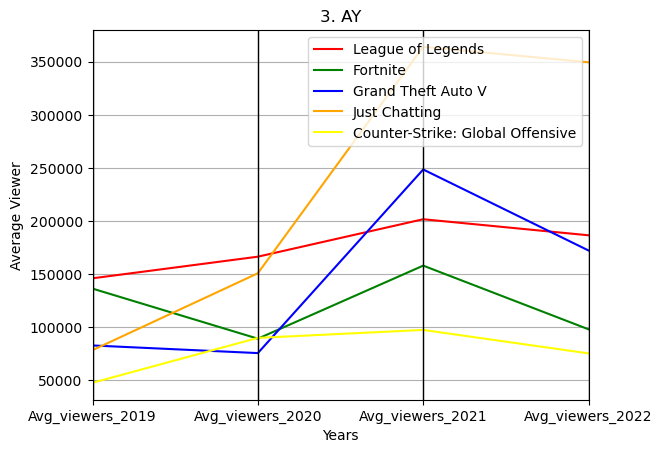

In [176]:
# Her yılın 3. ayında bulunan oyunların ortalama izlenme sayılarının paralel koordinat grafiği üzerinden karşılaştırdık

paralel_coord_3 = deduplicated_results[(deduplicated_results.Month == 3)]

fig, ax = plt.subplots()
pd.plotting.parallel_coordinates(paralel_coord_3, 
                                  cols=["Avg_viewers_2019", "Avg_viewers_2020", "Avg_viewers_2021", "Avg_viewers_2022"],
                                    class_column="Game",
                                     color=["red", "green", "blue", "orange", "yellow", "purple", "brown"],
                                  ax=ax)

# Eksenleri etiketledik
ax.set_xlabel("Years")
ax.set_ylabel("Average Viewer")
# Grafik başlığı
ax.set_title('3. AY')

# Grafiği gösterdik
plt.show()

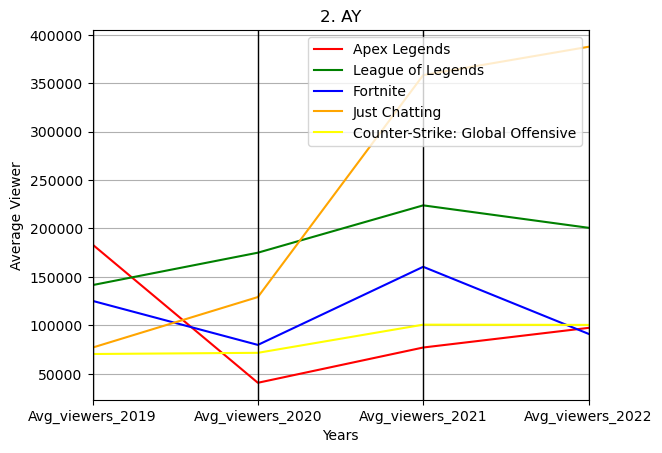

In [177]:
# Her yılın 2. ayında bulunan oyunların ortalama izlenme sayılarının paralel koordinat grafiği üzerinden karşılaştırdık

paralel_coord_2 = deduplicated_results[(deduplicated_results.Month == 2)]

fig, ax = plt.subplots()
pd.plotting.parallel_coordinates(paralel_coord_2, 
                                  cols=["Avg_viewers_2019", "Avg_viewers_2020", "Avg_viewers_2021", "Avg_viewers_2022"],
                                    class_column="Game",
                                     color=["red", "green", "blue", "orange", "yellow", "purple", "brown"],
                                  ax=ax)

# Eksenleri etiketledik
ax.set_xlabel("Years")
ax.set_ylabel("Average Viewer")
# Grafik başlığımız
ax.set_title('2. AY')

# Grafiği gösterdik
plt.show()

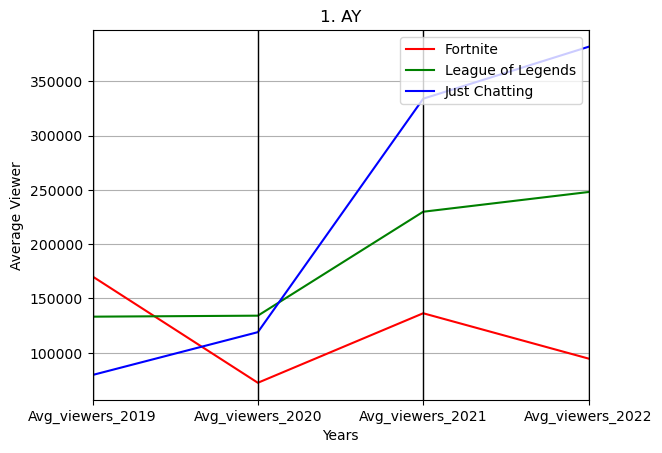

In [178]:
# Her yılın 1. ayında bulunan oyunların ortalama izlenme sayılarının paralel koordinat grafiği üzerinden karşılaştırdık

paralel_coord_1 = deduplicated_results[(deduplicated_results.Month == 1)]

fig, ax = plt.subplots()
pd.plotting.parallel_coordinates(paralel_coord_1, 
                                  cols=["Avg_viewers_2019", "Avg_viewers_2020", "Avg_viewers_2021", "Avg_viewers_2022"],
                                    class_column="Game",
                                     color=["red", "green", "blue", "orange", "yellow", "purple", "brown"],
                                  ax=ax)

# Eksenleri etiketledik
ax.set_xlabel("Years")
ax.set_ylabel("Average Viewer")
# Grafik başlığımız
ax.set_title('1. AY')

# Grafiği gösterdik
plt.show()

İlk olarak her bir yılın  Avg_channels ortalamasını bulduk. Ardından 2023 verisini çıkarttık. Bunun nedeni 2023 yılı daha tamamlanmadığından çıkacak olan sonucu  etkileyebileceğini düşündük. Her bir yılın Avg_channels'ının ortalamasının değerlerinin korelasyonunu aldık ve grafiğini oluşturduk .Bu ortalamaların korelasyonunu  0.94 bulduk.Sonuç olarak,  Year ve Avg_channels arasında pozitif yönlü bir ilişki olduğunu gördük.

Korelasyon (Yearly Average Channels): 0.9384843473841773


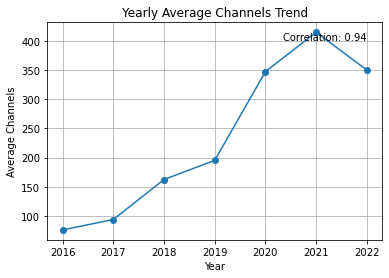

In [94]:

# Yılların 'Avg_channels' ortalamasını hesapladık
monthly_avg_channels = twitch_df.groupby(['Year'])['Avg_channels'].mean().reset_index()

# 2023 yılını veriden çıkarttık
monthly_avg_channels = monthly_avg_channels[monthly_avg_channels['Year'] != 2023]

# Korelasyonu hesapladık
correlation = monthly_avg_channels['Year'].corr(monthly_avg_channels['Avg_channels'])
print("Korelasyon (Yearly Average Channels):", correlation)

# Grafik kodumuz
plt.plot(monthly_avg_channels['Year'], monthly_avg_channels['Avg_channels'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Channels')
plt.title('Yearly Average Channels Trend')
plt.grid(True)

# Korelasyonumuzu grafiğe ekledik
plt.text(monthly_avg_channels['Year'].iloc[-1], monthly_avg_channels['Avg_channels'].max(), f'Correlation: {correlation:.2f}', verticalalignment='top', horizontalalignment='right')

plt.show()

Bu kod, yılların ortalama kanal sayıları ile korelasyonu hesaplar ve grafiğini çizer. İlk olarak, 2023 yılı verileri veri setinden çıkardık ve korelasyonu hesapladık. Ardından regresyon analizi yaptık ve regresyon çizgisini hesapladık. Bu çizgi, yılların ortalama kanal sayılarındaki eğilimi gösterir. Verilerin grafiği çizilir ve regresyon çizgisi ile birlikte gösterilir. Grafiğe korelasyon değerini de ekledik.
Bu analiz, yıllar arasındaki ortalama kanal sayılarındaki değişimin ne kadar güçlü olduğunu gösterdi.

Korelasyon (Yearly Average Channels): 0.9384843473841773


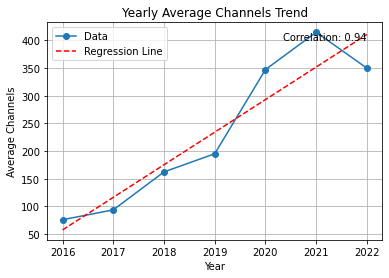

In [18]:
# 2023 yılını  veriden çıkarttık
monthly_avg_channels = monthly_avg_channels[monthly_avg_channels['Year'] != 2023]

# Korelasyonu hesapladık
correlation = monthly_avg_channels['Year'].corr(monthly_avg_channels['Avg_channels'])
print("Korelasyon (Yearly Average Channels):", correlation)

# Regresyon analizi kodu
slope, intercept, r_value, p_value, std_err = stats.linregress(monthly_avg_channels['Year'], monthly_avg_channels['Avg_channels'])
regression_line = slope * monthly_avg_channels['Year'] + intercept

# Grafik oluşturma kodu 
plt.plot(monthly_avg_channels['Year'], monthly_avg_channels['Avg_channels'], marker='o', linestyle='-', label='Data')
plt.plot(monthly_avg_channels['Year'], regression_line, linestyle='--', color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Average Channels')
plt.title('Yearly Average Channels Trend')
plt.grid(True)
plt.legend()

# Korelasyonu grafiğe ekledik
plt.text(monthly_avg_channels['Year'].iloc[-1], monthly_avg_channels['Avg_channels'].max(), f'Correlation: {correlation:.2f}', verticalalignment='top', horizontalalignment='right')
plt.show()